# Markowitz Portfolio Optimization

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt

### Input List of Tickers

In [2]:
ticker_list = ['AAPL','MSFT','GOOG','AMZN','TSLA','META']

### Extract Closing Price from YFinance and Compile into Data Frame

In [3]:
count = 0
for ticker in ticker_list:
    if count == 0:
        ticker_y = yf.Ticker(ticker)
        df = ticker_y.history(period="5y")
        df = df.reset_index()
        df = df.loc[:, ('Date','Close')]
        df = df.rename({'Close':ticker},axis=1)
        count += 1
        
    else:
        ticker_y = yf.Ticker(ticker)
        df_append = ticker_y.history(period="5y")
        df_append = df_append.reset_index()
        df_append = df_append.loc[:, ('Date','Close')]
        df_append = df_append.rename({'Close':ticker},axis=1)
        if len(df_append)==len(df):
            df[ticker]= df_append[ticker]
        else:
            print(ticker + ' does not match the length beacuse the stock is too new remove it')

In [4]:
df_tickers = df.drop('Date',axis=1)

In [5]:
df_tickers.head()

,AAPL,MSFT,GOOG,AMZN,TSLA,META
0,34.148617,65.472099,942.309998,48.208500,75.068001,149.800003
1,33.670551,65.565765,939.780029,49.385502,74.279999,150.639999
2,34.633778,66.380661,957.369995,49.758499,73.959999,152.869995
3,34.319008,65.481483,950.630005,49.629501,74.447998,152.250000
4,34.522541,65.818672,959.450012,50.111500,75.279999,153.910004


### Find Daily and Annual Returns

In [6]:
returns_daily = df_tickers.pct_change()
returns_annual = returns_daily.mean() * 250

In [7]:
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

### Create Portfolios Adjusting for Weights and Calculate Volatility, Returns and Sharpe Ratio

In [8]:
returns_list = []
volatility_list = []
sharpe_ratio = []
stock_weights = []


num_assets = len(ticker_list)
num_portfolios = 200000


for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns/volatility
    sharpe_ratio.append(sharpe)
    returns_list.append(returns)
    volatility_list.append(volatility)
    stock_weights.append(weights)

portfolio = {'Returns': returns_list,
             'Volatility': volatility_list,
            'Sharpe_Ratio':sharpe_ratio}


for counter,symbol in enumerate(ticker_list):
    portfolio[symbol+'_weight'] = [weight[counter] for weight in stock_weights]


df = pd.DataFrame(portfolio)


column_order = ['Returns', 'Volatility','Sharpe_Ratio'] + [stock+'_weight' for stock in ticker_list]

df = df[column_order]

df.head()

,Returns,Volatility,Sharpe_Ratio,AAPL_weight,MSFT_weight,GOOG_weight,AMZN_weight,TSLA_weight,META_weight
0,0.317217,0.339141,0.935354,0.005657,0.165387,0.046202,0.181464,0.301561,0.299728
1,0.307152,0.312751,0.982096,0.038777,0.161233,0.157072,0.237553,0.236056,0.169309
2,0.301867,0.318674,0.947261,0.031360,0.004460,0.408776,0.111342,0.264714,0.179349
3,0.342044,0.338917,1.009227,0.109164,0.233733,0.005731,0.073162,0.307938,0.270272
4,0.356357,0.342487,1.040498,0.116738,0.147216,0.116341,0.094497,0.338036,0.187173


In [9]:
minimum_volatility = df.Volatility.min()
maximum_sharpe = df.Sharpe_Ratio.max()

In [10]:
maximum_sharpe_portfolio = df.loc[df.Sharpe_Ratio == maximum_sharpe]
minimum_volatility_portfolio = df.loc[df.Volatility == minimum_volatility]

### Minimum Volatility Weightings

In [11]:
minimum_volatility_portfolio.T

,61001
Returns,0.257414
Volatility,0.268920
Sharpe_Ratio,0.957215
AAPL_weight,0.175071
MSFT_weight,0.336555
GOOG_weight,0.329306
AMZN_weight,0.138159
TSLA_weight,0.002173
META_weight,0.018736


### Maximum Sharpe Ratio Weightings

In [12]:
maximum_sharpe_portfolio.T

,129391
Returns,0.387517
Volatility,0.319428
Sharpe_Ratio,1.213160
AAPL_weight,0.297158
MSFT_weight,0.402855
GOOG_weight,0.014388
AMZN_weight,0.031345
TSLA_weight,0.253796
META_weight,0.000458


### Plot Results

In [13]:
plt.rcParams.update({'figure.figsize':(20,13)})
plt.rcParams.update({'font.size':20})

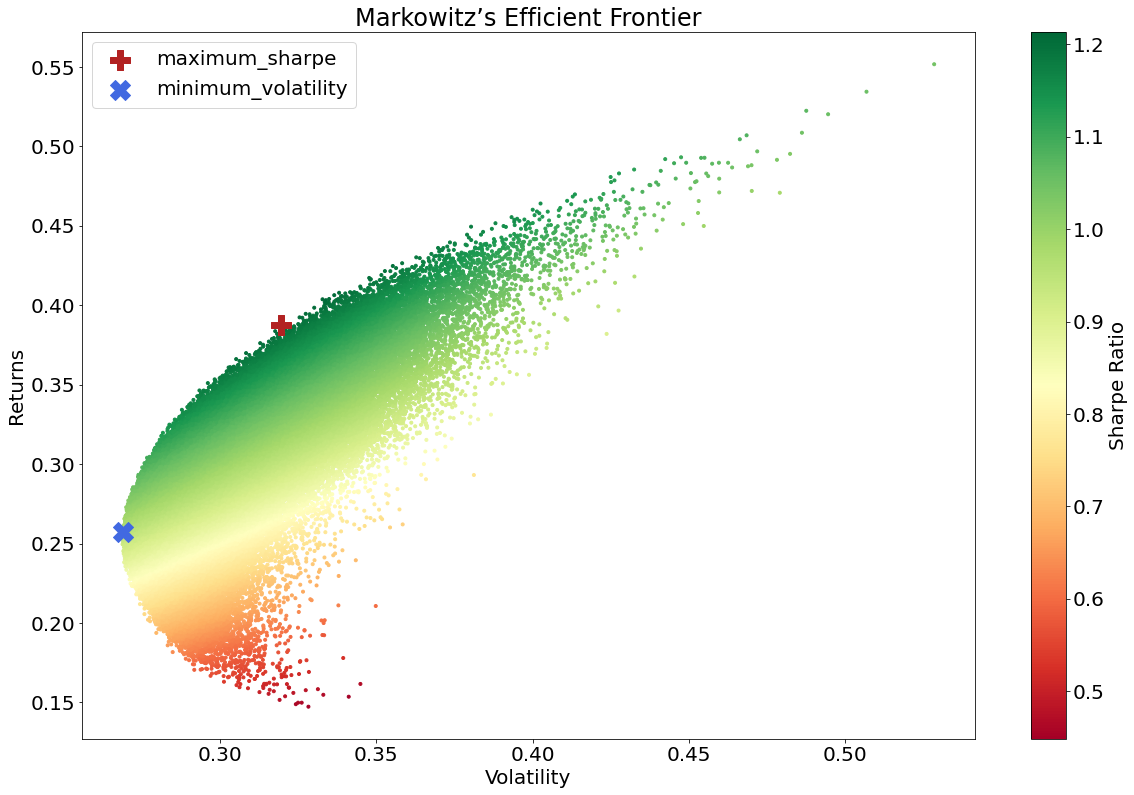

In [14]:
plt.scatter(df.Volatility, df.Returns,marker='.',c = df.Sharpe_Ratio, cmap='RdYlGn')
plt.colorbar().set_label('Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Markowitz’s Efficient Frontier')

plt.scatter(x=maximum_sharpe_portfolio.Volatility, y=maximum_sharpe_portfolio.Returns, c='firebrick', marker='P', s=400, label="maximum_sharpe")
plt.scatter(x=minimum_volatility_portfolio.Volatility, y=minimum_volatility_portfolio.Returns, c='royalblue', marker='X', s=400, label="minimum_volatility")
plt.legend()